# fill_blind_pores

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
ps.visualization.set_mpl_style()

## Create image and variables

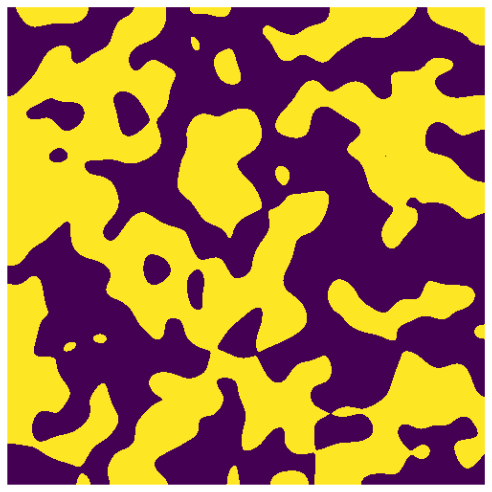

In [2]:
im = ps.generators.blobs(shape=[500,500])
plt.figure(figsize=[7,7])
plt.axis(False)
plt.imshow(im)

#default values:
conn = None

## Apply filter function

### conn
for 2D options are 4 or 8
for 3D options are 6 or 26

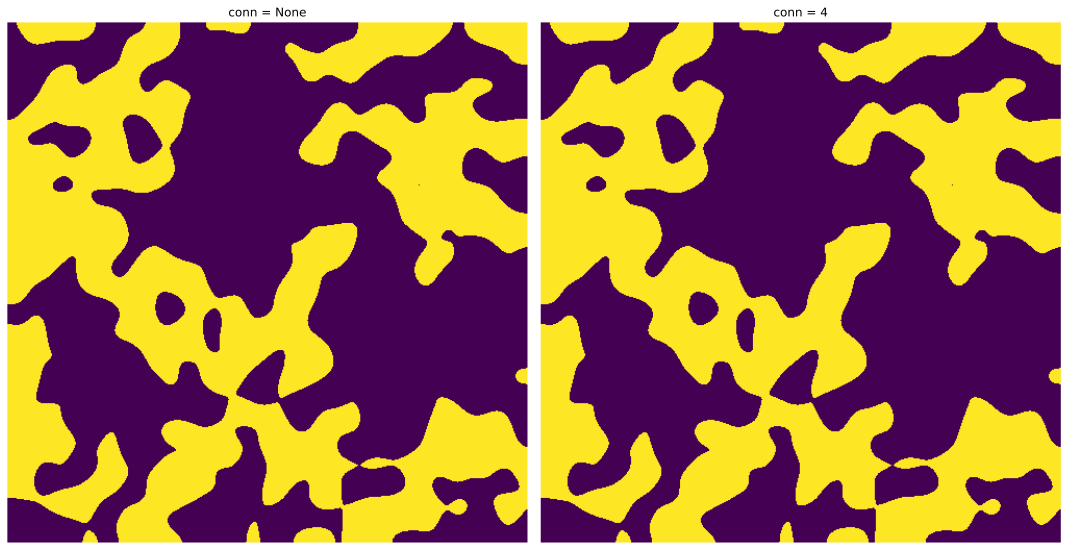

In [3]:
x = ps.filters.fill_blind_pores(im=im, conn=None)
xx = ps.filters.fill_blind_pores(im=im, conn= 4)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('conn = None')
ax[1].set_title('conn = 4');